## Bayesian Learning Lab 1

#### Part 1: Bernoulli Trials

##### a. Sampled Posterior vs True Posterior

Given $Y_1\cdots Y_n| \theta \overset{\text{iid}}{\sim} \textrm{Be}(\theta)$ we assume a prior beta distribution of the parameter $\theta$, namely $\Theta \sim \textrm{Beta}(\alpha_0, \beta_0)$. Aprior we believe $\alpha_0 = \beta_0 = 5$.

Suppose we make $n=50$ trials with $s=13$ successes. How does the posterior distribution look like for the paramter $\theta$? We sample from the posterior distribution to arrive at a sample distribution, which is compared with the theoretical correct posterior PDF.

In [1]:
import numpy as np
import seaborn as sns

from scipy.stats import beta
from matplotlib import pyplot as plt
import matplotlib

# Plotting configuration
%config InlineBackend.figure_format = 'retina'

#sns.set_theme()
#sns.set_style("whitegrid", {'grid.linestyle': '--'})
#seq_col_brew = sns.color_palette("flag_r", 4)
#sns.set_palette(seq_col_brew)

plt.style.use(['science', 'notebook', 'grid'])

FIGURE_FONT_SIZE = 14

# matplotlib.rc('text', usetex = True)
# matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

In [2]:
# Constants given in information.
nr_successes = 13 
nr_observations = 50
alpha_prior = 5
beta_prior = 5

In [3]:
# Samples from the posterior distribution.
nr_samples_dist_1 = 50
nr_samples_dist_2 = 500
nr_samples_dist_3 = 5000

alpha_post = (5 + 13)
beta_post = (5 + 37)

dist_1 = beta.rvs(alpha_post, beta_post, size=nr_samples_dist_1)
dist_2 = beta.rvs(alpha_post, beta_post, size=nr_samples_dist_2)
dist_3 = beta.rvs(alpha_post, beta_post, size=nr_samples_dist_3)

# Exact conjugate posterior distribution.
x = np.linspace(0, 1, 1000)
posterior_dist_cont = beta.pdf(x, alpha_post, beta_post)
prior_dist_cont = beta.pdf(x, alpha_prior, beta_prior)

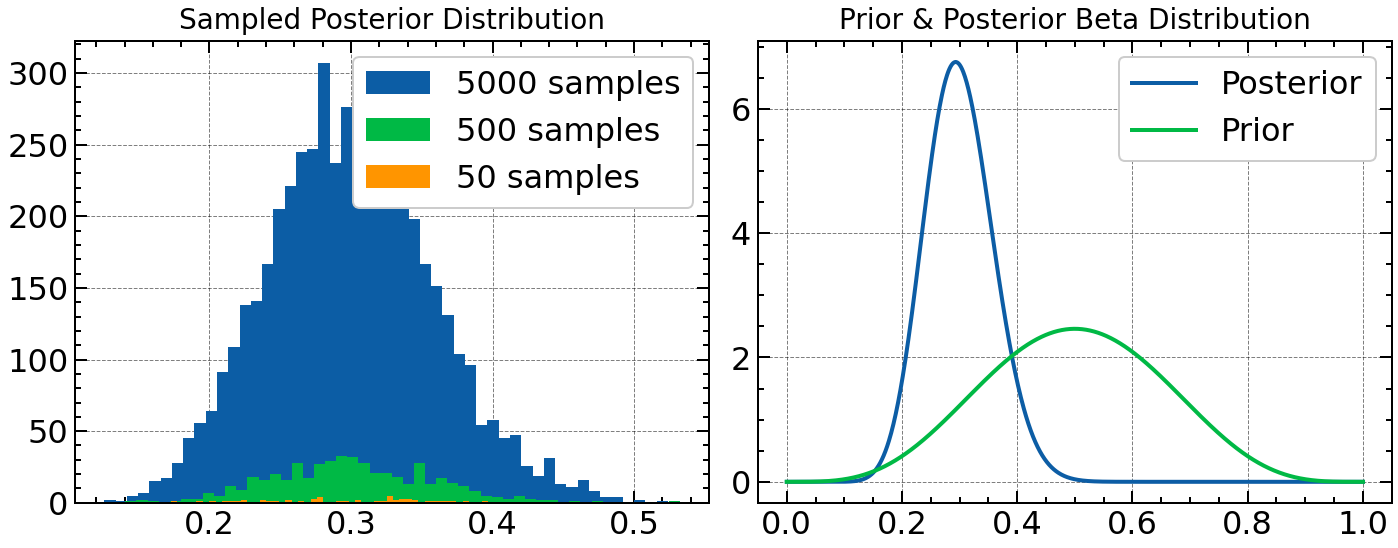

In [4]:
fig, axs = plt.subplots(1, 2)

axs[0].hist(dist_3, alpha=1, label=f'{nr_samples_dist_3} samples', bins=50)
axs[0].hist(dist_2, alpha=1, label=f'{nr_samples_dist_2} samples', bins=50)
axs[0].hist(dist_1, alpha=1, label=f'{nr_samples_dist_1} samples', bins=50)
#axs[0].set_frame_on(False)
axs[0].set_title('Sampled Posterior Distribution', fontsize=FIGURE_FONT_SIZE)
axs[0].legend()

axs[1].plot(x, posterior_dist_cont, label='Posterior')
axs[1].plot(x, prior_dist_cont, label='Prior')
#axs[1].set_frame_on(False)
axs[1].set_title('Prior & Posterior Beta Distribution', fontsize=FIGURE_FONT_SIZE)
axs[1].legend()

fig.set_size_inches(10, 4)
plt.tight_layout()
plt.show()

It is clear that the sample distribution approaches the same mean value and dispersion as the theoreically true posterior distribution. This is most notably observed for $N=5000$ samples vs. the posterior distribution above.

---


##### b. Sampled Posterior Probability vs True Posterior Probability

Using sampling techinques of the posterior distribution we are also able to examine probabilities. In this case we try to find $\mathbb{P}(\theta < 0.3 | \mathbf{y})$ using sampling and comapring with the true probability through the Beta distribution's CDF.

In [5]:
nr_samples_dist_4 = 10000
dist_4 = beta.rvs(alpha_post, beta_post, size=nr_samples_dist_4)
nr_target_theta = sum(i < 0.3 for i in dist_4)

sample_probability = nr_target_theta/nr_samples_dist_4
true_probability = beta.cdf(0.3, alpha_post, beta_post)

print(f'Sample probability: {sample_probability}')
print(f'True probability: {true_probability}')
print(f'Absoulte difference: {abs(true_probability - sample_probability)}')

Sample probability: 0.5054
True probability: 0.5150226349500612
Absoulte difference: 0.009622634950061215


---

##### c. Distribution of Log Odds using Posterior Distribution
Next, we showcase how we are able to flexibly calculate the posterior distribution of log-odds by sampling from the posterior distribution. Log-odds are defined as:

$$
\phi \triangleq \ln\frac{\theta}{1-\theta}
$$

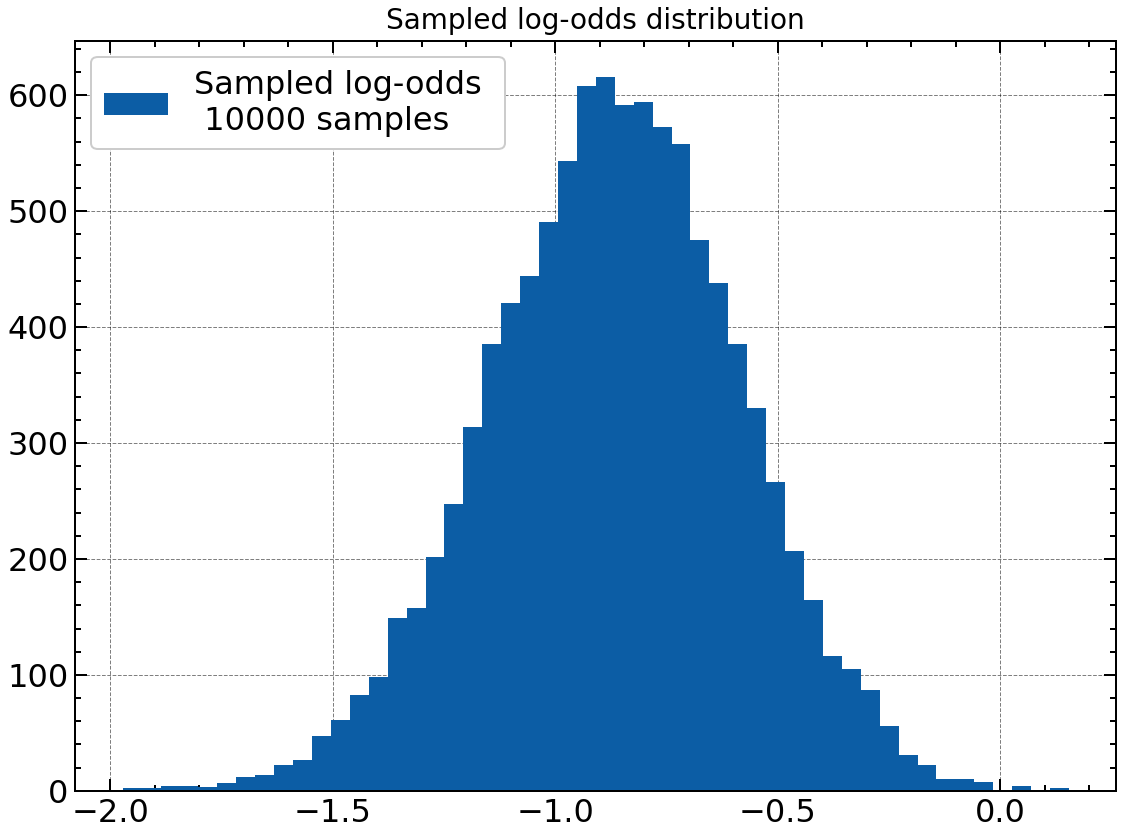

In [6]:
nr_samples_dist_5 = 10000
dist_5 = beta.rvs(alpha_post, beta_post, size=nr_samples_dist_5)
dist_5 = np.log(dist_5/(1-dist_5))

fig, ax = plt.subplots()

ax.hist(dist_5, label = f'Sampled log-odds \n {nr_samples_dist_5} samples', bins=50)
#ax.set_frame_on(False)
ax.legend()
ax.set_title('Sampled log-odds distribution', fontsize=FIGURE_FONT_SIZE)

plt.tight_layout()
plt.show()

---

#### Part 2: Log-Distributions & Gini Coefficients

##### a. Log Normal Posterior Distribution of Standard Deviation
We assume the following model for wages in thousands of SEK: $Y_1,\cdots,Y_n|\mu,  \sigma^2 \overset{\text{iid}}{\sim} \textrm{log N}(\mu, \sigma^2)$, in which $\mu = 3.5$ is known with certainty. If we use the non-informative, non-proper, non-conjugate prior $p(\sigma^2) \propto \sigma^{-2}$ we obtain the full posterior distribution as:

$$
\sigma^2 \sim \textrm{Scale-inv-}\chi^2(n, \tau^2)
$$

In which,

$$
\tau^2 = \frac{\sum_{i_1}^n(\ln y_i - \mu)^2}{n}
$$

Now we can plot the posterior distribution by drawing 10 000 samples from it, which is done below. Also, using the same samples we can simulate the posterior distribution of the Gini coefficient defined as $G = 2\Phi(\sigma/\sqrt{2})-1$ when the sample is for a log-normal distribution.

In [7]:
mu = 3.5
observations = [33, 24, 48, 32, 55, 74, 23, 76, 17]
nr_observations = len(observations)
tau_squared = sum(np.log((obs - 3.5)) ** 2 for obs in observations) / nr_observations

from scipy.stats import chi2, norm

# Using a result found on Wikipedia relating Scale-inv-Chi2 to Chi2 distribution.
nr_draws = 10000
samples = nr_observations * tau_squared * 1 / (chi2.rvs(nr_observations, size=nr_draws))
gini_samples = 2 * norm.cdf(np.sqrt(samples) / np.sqrt(2)) - 1


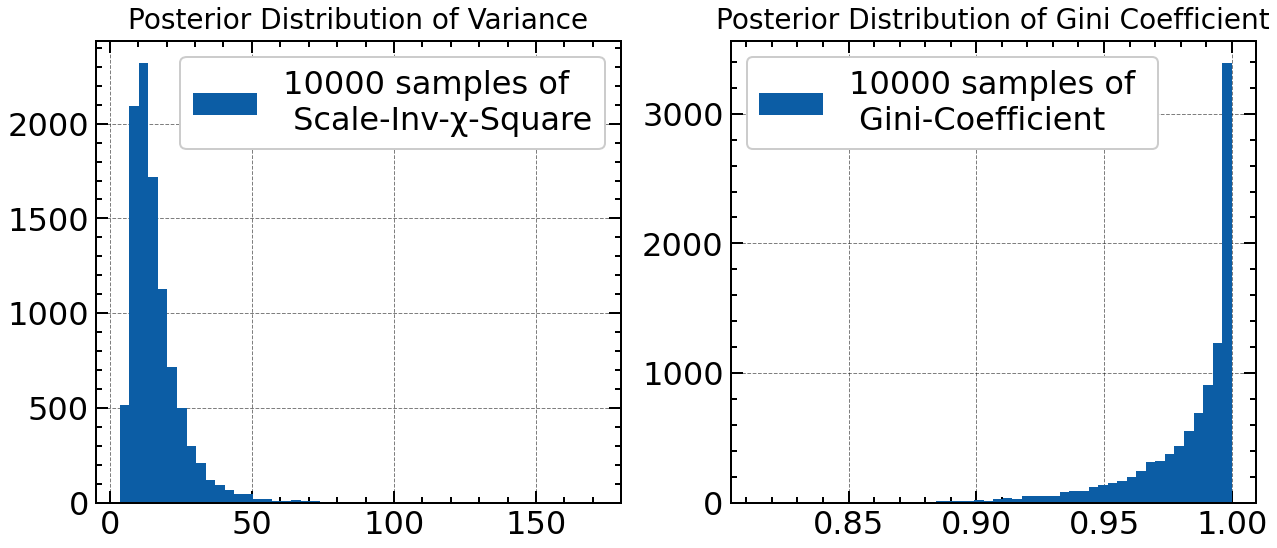

In [8]:
fig, axs = plt.subplots(1, 2)

axs[0].set_title('Posterior Distribution of Variance', fontsize=FIGURE_FONT_SIZE)
axs[0].hist(samples, label=f'{nr_draws} samples of \n Scale-Inv-χ-Square', bins=50)
# axs[0].set_frame_on(False)
axs[0].legend()

axs[1].set_title('Posterior Distribution of Gini Coefficient', fontsize=FIGURE_FONT_SIZE)
axs[1].hist(gini_samples, label=f'{nr_draws} samples of \n Gini-Coefficient', bins=50)
# axs[1].set_frame_on(False)
axs[1].legend()


fig.set_size_inches(9, 4)
plt.tight_layout()
plt.show()

Next, we can create credible intervals for the Gini parameter $G$ given the posterior distribution. A 95 percent equal tail credible interval is constructed below using the empirical posterior distribution ascertained in the previous exercise.

In [9]:
interval = np.quantile(gini_samples, (0.025, 0.975))
print(interval)

[0.91797457 0.99999574]


A HPDI (Highest Posterior Density Interval) can also be created for the Gini parameter $G$ given the posterior distribution. Since we know the distribution is capped at $1$ we can create an ad-hoc method of finding the HPDI. Let the HPDI be $[\alpha, 1]$. To obtain the lower bound $\alpha$ we simply solve the following equation:

$$
\int_{\alpha}^1f_G(g)dg = 0.95
$$

$$
F_G(1) - F_G(\alpha) = 1 - 0.05
$$

Since the support of the Gini coefficient is on $[0,1]$ we know $F_G(1) = 1$, and so we obtain:

$$
\alpha = F_G^{-1}(0.05)
$$

Instead of using kernel methods to estimate the continuous PDF we can simply use the emprical distribution once again to estimate the $0.05$ quantile.

In [10]:
interval = [np.quantile(gini_samples, 0.05), 1]
print(interval)

[0.9351803667337216, 1]


This method is clearly not a scalable solution to the issue at hand. However, a general solution to the problem is quite difficult.

---

#### Part 3: The von Mises Distribution

Given observations of the kind $Y_1,\ldots,Y_n|\mu, \kappa \overset{\textrm{iid}}{\sim} f_Y(y|\mu, \kappa) \triangleq \frac{\exp \{ \kappa \cos(y-\mu) \}}{2\pi I_0(\kappa)}$ we want to conduct Bayesian inference. Note, the pdf has the support $S(y) = \{y|y\in [-\pi, \pi]\}$ and $I_0(\kappa)$ is the so-called modified Bessel function of the first kind of order zero.

This is a distribution of directional data, where $\mu \in [-\pi, \pi]$ and $\kappa > 0$. Assuming $\mu = 2.51$ is known exactly, we let $\Kappa \sim \textrm{Exp}(1)$ as our aprior belief of the parameter $\kappa$.

We can now apply Baye's theorem and retrieve the posterior distribution in the following manner:

$$
p(\kappa|\mathbf{y}) = \frac{p(\mathbf{y}|\kappa)p(\kappa)}{p(\mathbf{y})}
$$
$$
= \frac{e^{-\kappa}\prod_{i=1}^n\frac{\exp \{ \kappa \cos(y-\mu) \}}{2\pi I_0(\kappa)}}{\int_{0}^{\infty}p(\mathbf{y}|\kappa)p(\kappa)d\kappa}                 
$$
$$
= \frac{\frac{1}{(2\pi I_0(\kappa))^n}\exp \{\kappa(\sum_{i=1}^n \cos(y_i-\mu) -1) \}}{\int_{0}^{\infty}p(\mathbf{y}|\kappa)p(\kappa)d\kappa}
$$
$$
\propto \frac{1}{I_0(\kappa)^n}\exp \{\kappa(\sum_{i=1}^n \cos(y_i-\mu) -1) \}
$$

In [11]:
from scipy.special import iv
from scipy.integrate import quad


def posterior_distribution_pdf(x: float, data: list, mu: float) -> float:
    n = len(data)
    denominator = (1 / (2 * np.pi * iv(0, x))) ** n
    cos_sum = np.sum(np.cos(np.array(data) - mu)) - 1
    return denominator * np.exp(x * cos_sum)

def posterior_bayes_factor(data: list, mu: float) -> float:
    return quad(posterior_distribution_pdf, 0, 20, args=(data, mu))[0]


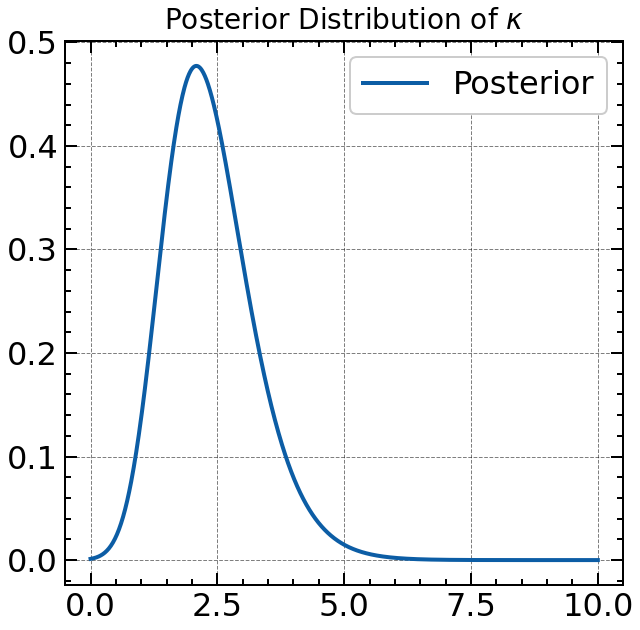

In [12]:
data = [1.83, 2.02, 2.33, -2.79, 2.07, 2.02, -2.44, 2.14, 2.54, 2.23]
kappa = np.linspace(0, 10, 1000)
bayes_factor = posterior_bayes_factor(data, 2.51)
dist_values  = posterior_distribution_pdf(kappa, data, 2.51) / bayes_factor

fig, ax = plt.subplots()
ax.plot(kappa, dist_values, label='Posterior')
ax.set_title('Posterior Distribution of $\kappa$', fontsize=FIGURE_FONT_SIZE)
# ax.set_frame_on(False)
ax.legend()
fig.set_size_inches(5, 5)
plt.show()

Finally, using the posterior distribution derived above we can find the approximate posterior mode. This is done below using a dict with sorted values of the density and their corresponding values of $\kappa$.

In [13]:
value_pairs = zip(kappa, dist_values)
value_dict = dict(value_pairs)
a = sorted(value_dict.items(), key=lambda x: x[1])    
print(a[-1])

(2.0820820820820822, 0.47727413534741864)


The approxmiate posterior mode is 2.082.

---